# Assignment 1 - Exploratory Data Analysis : R tasks

In [1]:
!pip install rpy2==3.5.1

In [2]:
%load_ext rpy2.ipython

#1A: Display all the details about the dataset

In [3]:
%%R
# Load the required library
library(readr)

# Read the dataset
movies_data <- read_csv("netflix_titles.csv")

# Display all the details about the dataset
str(movies_data)

Rows: 8807 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): show_id, type, title, director, cast, country, date_added, rating,...
dbl  (1): release_year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
spc_tbl_ [8,807 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ show_id     : chr [1:8807] "s1" "s2" "s3" "s4" ...
 $ type        : chr [1:8807] "Movie" "TV Show" "TV Show" "TV Show" ...
 $ title       : chr [1:8807] "Dick Johnson Is Dead" "Blood & Water" "Ganglands" "Jailbirds New Orleans" ...
 $ director    : chr [1:8807] "Kirsten Johnson" NA "Julien Leclercq" NA ...
 $ cast        : chr [1:8807] NA "Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile "| __truncated__ "Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouc

#1B :Check for null values within each column.
#Fill the values for more than 100 missing columns with certain label such as No Director, Country Unavailable, etc. Drop the rows for the rest missing columns.

In [4]:
%%R
# Load the required library
library(tidyr)

# Counting the null/missing values of particular columns
null_count <- colSums(is.na(movies_data))

# Printing the null_count
print(null_count)

# Retrieve the columns which have more than 100 missing values
missing_cols <- names(null_count[null_count > 100])

# Printing columns with more than 100 missing values
print('Columns with more than 100 missing value:')
print(missing_cols)

# Define fill values for missing columns
fill_values <- list(
  "director" = "No Director",
  "country" = "Country Unavailable",
  "cast" = "Cast Unavailable"
)

# Using fill_values to fill the missing columns of more than 100
for (col in names(fill_values)) {
  if (col %in% names(movies_data)) {
    movies_data[[col]] <- ifelse(is.na(movies_data[[col]]), fill_values[[col]], movies_data[[col]])
  }
}

# Drop rows with less than 100 missing columns (i.e., keeping only rows without any missing values)
movies_data <- drop_na(movies_data)

# Verify the changes
null_counts_after <- colSums(is.na(movies_data))
print(null_counts_after)
print(movies_data)


     show_id         type        title     director         cast      country 
           0            0            0         2634          825          831 
  date_added release_year       rating     duration    listed_in  description 
          10            0            4            3            0            0 
[1] "Columns with more than 100 missing value:"
[1] "director" "cast"     "country" 
     show_id         type        title     director         cast      country 
           0            0            0            0            0            0 
  date_added release_year       rating     duration    listed_in  description 
           0            0            0            0            0            0 
# A tibble: 8,790 × 12
   show_id type    title   director cast  country date_added release_year rating
   <chr>   <chr>   <chr>   <chr>    <chr> <chr>   <chr>             <dbl> <chr> 
 1 s1      Movie   Dick J… Kirsten… Cast… United… September…         2020 PG-13 
 2 s2      TV Sho

#1C: Display a two horizontal bar chart side by side for Top 10 countries with total number of movies and TV shows.

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




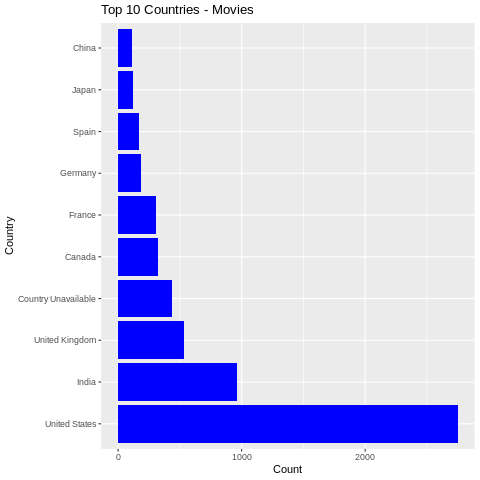

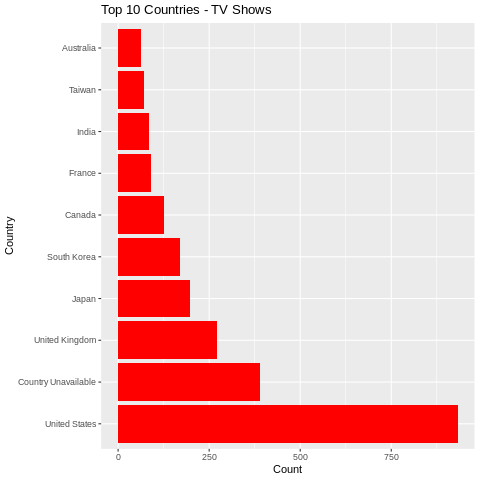

In [5]:
%%R
# Load the required libraries
library(dplyr)
library(tidyr)
library(ggplot2)



# Generate distinct rows for the countries with multiple values
movies_data$country <- strsplit(movies_data$country, ", ")
movies_data_expanded <- unnest(movies_data, country)

# Filtering movies and TV shows separately
movies <- filter(movies_data_expanded, type == "Movie")
tv_shows <- filter(movies_data_expanded, type == "TV Show")

# Count the number of movies and TV shows for each country
movies_count <- count(movies, country) %>%
  arrange(desc(n)) %>%
  head(10)

tv_shows_count <- count(tv_shows, country) %>%
  arrange(desc(n)) %>%
  head(10)

# Create a figure with two subplots
p1 <- ggplot(movies_count, aes(reorder(country, -n), n)) +
  geom_bar(stat = "identity", fill = "blue") +
  coord_flip() +
  labs(title = "Top 10 Countries - Movies", x = "Country", y = "Count")

p2 <- ggplot(tv_shows_count, aes(reorder(country, -n), n)) +
  geom_bar(stat = "identity", fill = "red") +
  coord_flip() +
  labs(title = "Top 10 Countries - TV Shows", x = "Country", y = "Count")

# Display the plots
print(p1)
print(p2)




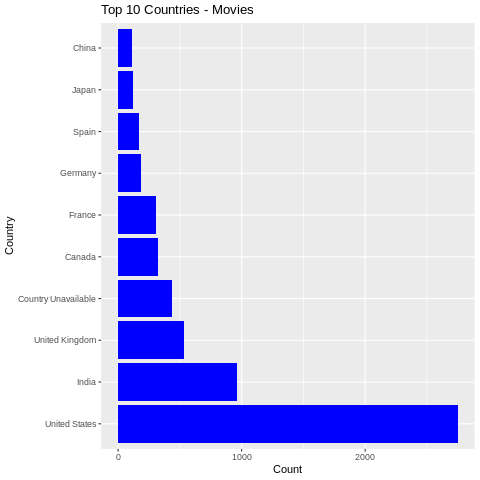

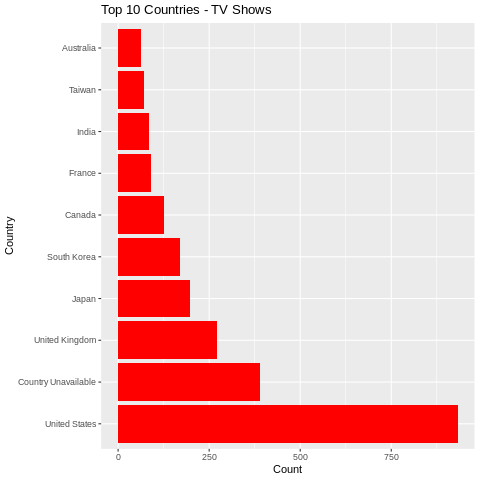

In [6]:
%%R
print(p1)
print(p2)

#1D:Print the first row based on the longest duration time of a movie from each country column with its director, date_added, release_year, duration of the movie and its description.

In [7]:
%%R
# Convert the "duration" column to character type
movies_data_expanded$duration <- as.character(movies_data_expanded$duration)

# Extract numeric values from the "duration" column
movies_data_expanded$duration <- as.numeric(gsub("\\D", "", movies_data_expanded$duration))

# Group the movies by country and find the movie with the longest duration for each country
longest_movies <- movies_data_expanded[which(movies_data_expanded$duration == ave(movies_data_expanded$duration, movies_data_expanded$country, FUN = max)), ]

# Select the desired columns for the result
long_duration_movies <- longest_movies[c('country', 'director', 'date_added', 'release_year', 'duration', 'description')]

# Loop through the rows and print the information
for (i in 1:nrow(longest_movies)) {
    row <- longest_movies[i, ]
    if (row$country == "") {
        cat("Country:", "No Director\n")
    } else {
        cat("Country:", row$country, "\n")
    }
    cat("Director:", row$director, "\n")
    cat("Date Added:", row$date_added, "\n")
    cat("Release Year:", row$release_year, "\n")
    cat("Duration (minutes):", row$duration, "\n")
    cat("Description:", row$description, "\n\n")
}


Country: Burkina Faso 
Director: Haile Gerima 
Date Added: September 24, 2021 
Release Year: 1993 
Duration (minutes): 125 
Description: On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past. 

Country: Ethiopia 
Director: Haile Gerima 
Date Added: September 24, 2021 
Release Year: 1993 
Duration (minutes): 125 
Description: On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past. 

Country: Nigeria 
Director: Kemi Adetiba 
Date Added: September 14, 2021 
Release Year: 2018 
Duration (minutes): 182 
Description: When a powerful businesswoman’s political ambitions are threatened by her underworld connections, the ensuing power struggle could cost her everything. 

Country: Italy 
Director: Sergio Leone 
Date Added: September 1, 2021 
Release Year: 1984 
Duration (minutes): 229 
Description: Directo

#1E:Display the titleof the movie, its director, the date it was added to the platform and the date it was officially released where the official release date and the date it was added to the plafform has same year.

In [8]:
%%R
# Filter the dataset for movies only
movies_only <- subset(movies_data, type == "Movie")

# Filter the movies where the release year and date added year are the same
movies_same_year <- subset(movies_only, as.numeric(substr(date_added, nchar(date_added)-3, nchar(date_added))) == release_year)

# Select the desired columns for the result
result <- movies_same_year[c('title', 'director', 'date_added', 'release_year')]

# Print the result
print(result)


# A tibble: 1,860 × 4
   title                                        director date_added release_year
   <chr>                                        <chr>    <chr>             <dbl>
 1 My Little Pony: A New Generation             Robert … September…         2021
 2 The Starling                                 Theodor… September…         2021
 3 Je Suis Karl                                 Christi… September…         2021
 4 Confessions of an Invisible Girl             Bruno G… September…         2021
 5 Intrusion                                    Adam Sa… September…         2021
 6 Go! Go! Cory Carson: Chrissy Takes the Wheel Alex Wo… September…         2021
 7 Ankahi Kahaniya                              Ashwiny… September…         2021
 8 The Father Who Moves Mountains               Daniel … September…         2021
 9 The Stronghold                               Cédric … September…         2021
10 My Heroes Were Cowboys                       Tyler G… September…         2021
# ℹ 1,

#1F:Display Director, the release year and number of movies and TV Shows directed by that director within a year and sort the results from highest.


In [9]:
%%R



# Filter the dataset for movies and TV shows separately
movies <- filter(movies_data, type == "Movie")
tv_shows <- filter(movies_data, type == "TV Show")

# Group the movies by director and release year
movies_grouped <- movies %>%
  group_by(director, release_year) %>%
  summarize(movie_count = n())

# Group the TV shows by director and release year
tv_shows_grouped <- tv_shows %>%
  group_by(director, release_year) %>%
  summarize(tv_show_count = n())

# Merge the movie and TV show counts for each director and release year
result <- full_join(movies_grouped, tv_shows_grouped, by = c('director', 'release_year')) %>%
  replace(is.na(.), 0)

# Calculate the total count and sort the result by total count in descending order
result <- result %>%
  mutate(total_count = movie_count + tv_show_count) %>%
  arrange(desc(total_count))

# Print the result
print(result)


`summarise()` has grouped output by 'director'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'director'. You can override using the
`.groups` argument.
# A tibble: 5,948 × 5
# Groups:   director [4,527]
   director    release_year movie_count tv_show_count total_count
   <chr>              <dbl>       <int>         <int>       <int>
 1 No Director         2020          22           383         405
 2 No Director         2019          35           366         401
 3 No Director         2018          30           356         386
 4 No Director         2021          25           270         295
 5 No Director         2017          18           240         258
 6 No Director         2016          17           231         248
 7 No Director         2015          10           147         157
 8 No Director         2014           6            79          85
 9 No Director         2012           3            58          61
10 No Director         2013      

1G:Display the title of the movie/TV shows, the Director, the date it was added to netflix and the category it was listed in from the data which belongs to Documentary/Docuseries category.

In [10]:
%%R
# Filter the dataset for Documentary/Docuseries category
documentaries <- filter(movies_data, grepl('Documentaries|Docuseries', listed_in))

# Select the desired columns for the result
result <- documentaries %>%
  select(title, director, date_added, listed_in)

# Print the result
print(result)

# A tibble: 1,263 × 4
   title                                           director date_added listed_in
   <chr>                                           <chr>    <chr>      <chr>    
 1 Dick Johnson Is Dead                            Kirsten… September… Document…
 2 Jailbirds New Orleans                           No Dire… September… Docuseri…
 3 Vendetta: Truth, Lies and The Mafia             No Dire… September… Crime TV…
 4 Crime Stories: India Detectives                 No Dire… September… British …
 5 Europe's Most Dangerous Man: Otto Skorzeny in … Pedro d… September… Document…
 6 Monsters Inside: The 24 Faces of Billy Milligan Olivier… September… Crime TV…
 7 Love on the Spectrum                            No Dire… September… Docuseri…
 8 My Heroes Were Cowboys                          Tyler G… September… Document…
 9 Raja Rasoi Aur Anya Kahaniyan                   No Dire… September… Docuseri…
10 Schumacher                                      Hanns-B… September… Document…
# ℹ 1,

Task 1H : 4 points
Display title, the date it was added to the plaform, type of category it was listed in and its description for Family Dramas.

Hint: Use Description to look for type of Drama.

In [11]:
%%R

# Filter for Drama movies
drama_movies <- subset(movies_data, grepl("Drama", listed_in, ignore.case = TRUE))

# Filter for Family Dramas
family_dramas <- subset(drama_movies, grepl("Family", description, ignore.case = TRUE))

# Select desired columns
result <- family_dramas[, c("title", "date_added", "listed_in", "description")]

# Display the result
print(result)


# A tibble: 307 × 4
   title                               date_added         listed_in  description
   <chr>                               <chr>              <chr>      <chr>      
 1 Je Suis Karl                        September 23, 2021 Dramas, I… After most…
 2 Omo Ghetto: the Saga                September 10, 2021 Action & … Twins are …
 3 Shadow Parties                      September 6, 2021  Dramas, I… A family f…
 4 Gurgaon                             September 2, 2021  Dramas, I… When the d…
 5 Agatha Christie's Crooked House     September 1, 2021  Dramas, I… When a det…
 6 Clickbait                           August 25, 2021    Crime TV … When famil…
 7 Post Mortem: No One Dies in Skarnes August 25, 2021    Internati… She's back…
 8 Bombay                              August 18, 2021    Dramas, I… Years afte…
 9 The Lincoln Lawyer                  August 1, 2021     Dramas, T… A street-w…
10 2 Weeks in Lagos                    July 16, 2021      Dramas, I… A business…
# ℹ 297 

Task 1I: 5 points
Plot the Distribution of TV shows based on their number of seasons.(horizontal bar chart)

Less than 3 seasons
3 Seasons
4 Seasons
5 to less than 10 seasons.
10 or more seasons.

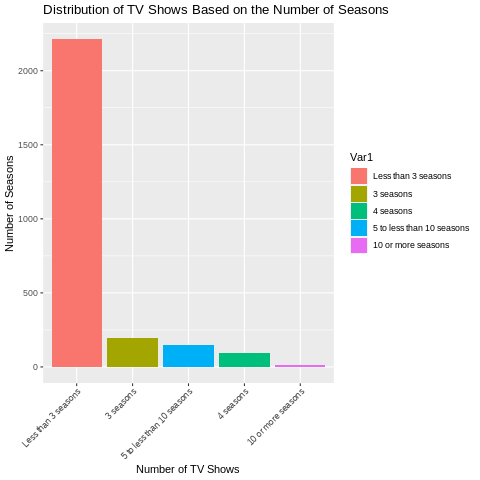

In [12]:
%%R
# Load the required libraries
library(dplyr)
library(ggplot2)

# # Copying only TV Shows from movies_data
tv_shows <- filter(movies_data, type == "TV Show")

# Getting the number of seasons
tv_shows$number_of_seasons <- as.numeric(gsub("\\D", "", tv_shows$duration))

# Grouping TV show's seasons into categories
bins <- c(0, 3, 4, 5, 10, Inf)
labels <- c(
  "Less than 3 seasons",
  "3 seasons",
  "4 seasons",
  "5 to less than 10 seasons",
  "10 or more seasons"
)
tv_shows$season_category <- cut(tv_shows$number_of_seasons, breaks = bins, labels = labels, right = FALSE)

# Count the number of TV shows in each season category
season_counts <- table(tv_shows$season_category)

# Convert the table to a data frame
season_counts_df <- as.data.frame(season_counts)

# Create a horizontal bar chart
ggplot(season_counts_df, aes(x = reorder(Var1, -Freq), y = Freq, fill = Var1)) +
  geom_bar(stat = "identity") +
  labs(x = "Number of TV Shows", y = "Number of Seasons", title = "Distribution of TV Shows Based on the Number of Seasons") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Task 1J: 6 points
Display a side by side pie chart where it shows different rating a movie and a TV show belongs to.

Movie:

Uncut/Not rated,
Restricted,
Parentel guidance,
General audience,
Adults only

TV Show:
All Children,
Older Children,
Parentel Presence,
General audience,
Mature


Attaching package: ‘gridExtra’



    combine




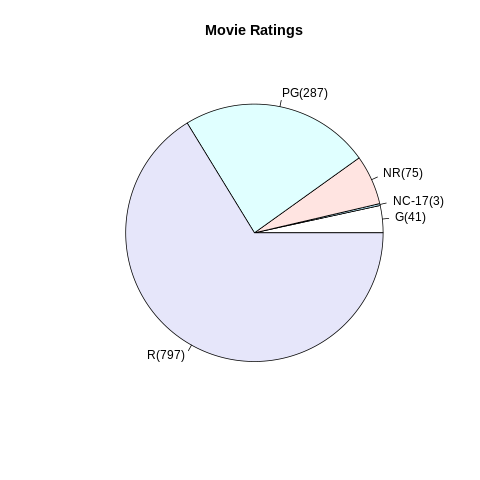

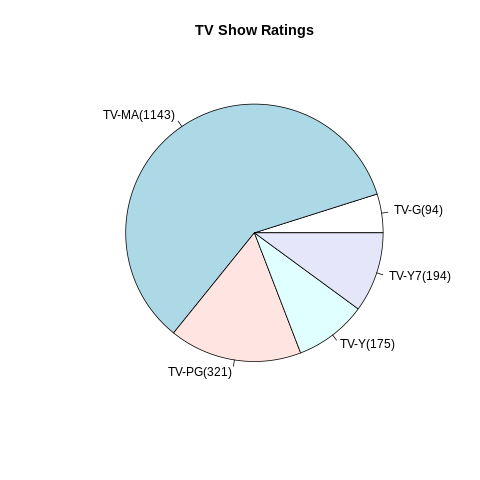

In [11]:
%%R
# Install the gridExtra package if not already installed
if (!requireNamespace("gridExtra", quietly = TRUE)) {
  install.packages("gridExtra")
}
# Load the required libraries
library(ggplot2)
library(gridExtra)

# Movie Ratings
movie_ratings <- c("NR", "R", "PG", "G", "NC-17")

# Filter movies with specific ratings
filtered_movies <- movies_data %>%
  filter(type == "Movie", rating %in% movie_ratings)

# TV Show Ratings
tv_show_ratings <- c("TV-Y", "TV-Y7", "TV-PG", "TV-G", "TV-MA")

# Filter TV shows with specific ratings
filtered_tv_shows <- movies_data %>%
  filter(type == "TV Show", rating %in% tv_show_ratings)

# Count the number of movies and TV shows for each rating category
movie_rating_counts <- table(filtered_movies$rating)
tv_show_rating_counts <- table(filtered_tv_shows$rating)

# Create pie charts for movie ratings and TV show ratings
pie_chart_movies <- pie(movie_rating_counts, labels = paste(names(movie_rating_counts), "(", movie_rating_counts, ")", sep = ""), main = "Movie Ratings")
pie_chart_tv_shows <- pie(tv_show_rating_counts, labels = paste(names(tv_show_rating_counts), "(", tv_show_rating_counts, ")", sep = ""), main = "TV Show Ratings")

# Display the pie charts in the output cell
grid.arrange(pie_chart_movies, pie_chart_tv_shows, ncol = 2)
